In [26]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download("brown")
nltk.download("stopwords")
from nltk.corpus import brown
import re

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
data = brown.sents()

## Предобработка текста

Нужно подготовить текст для обучения модели. Для этого нужно выполнить следующие шаги:
1. Привести текст к нижнему регистру
2. Удалить пунктуацию
3. Удалить стоп-слова
4. Привести слова к начальной форме

In [28]:
sents = list(data)
sents_copy = list(brown.sents())
n = len(sents)
print("Удаление спец символов")
for i in range(0, n):
  for word in sents[i]:
    if not bool(re.search('[A-Za-z0-9]', word)):
      sents_copy[i].remove(word)
print("Готово")
sents=None

for i in range(0, n):
  m = len(sents_copy[i])
  for j in range(0, m):
    sents_copy[i][j] = sents_copy[i][j].lower()
print('Всё в нижнем регистре')

from nltk.corpus import stopwords
filtered_words = [word for word in sents_copy if word not in stopwords.words('english')]

Удаление спец символов
Готово
Всё в нижнем регистре


In [29]:
print (sents_copy[0])

['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produced', 'no', 'evidence', 'that', 'any', 'irregularities', 'took', 'place']


In [30]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('wordnet')

final_words = []
norm_word = []

wnl = WordNetLemmatizer()

for n in range(len(sents_copy)):
  for word in sents_copy[n]:
    final_words.append(wnl.lemmatize(word, pos="v"))
  norm_word.append(final_words)
  final_words = []


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
print(sents_copy[0:2])
print(norm_word[0])

[['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produced', 'no', 'evidence', 'that', 'any', 'irregularities', 'took', 'place'], ['the', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'city', 'executive', 'committee', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'city', 'of', 'atlanta', 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted']]
['the', 'fulton', 'county', 'grand', 'jury', 'say', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produce', 'no', 'evidence', 'that', 'any', 'irregularities', 'take', 'place']


In [32]:
data = norm_word

## Реалиозвать метод bag of words и сравнить его с методом CountVectorizer из библиотеки sklearn

In [33]:
new_data = []
for i in range(len(data)):
  word = " ".join(data[i])
  new_data.append(word)

print(new_data[0])

the fulton county grand jury say friday an investigation of atlanta's recent primary election produce no evidence that any irregularities take place


In [34]:
new_data = new_data[0:2]

In [35]:
dic = {}

def bag_of_words(data):
  vocab = {}
  for text in data:
    dic[text] = " "
    for word in text:
      if word not in vocab:
        vocab[word] = len(vocab)

  vectors = []
  for text in data:
    vector = [0] * len(vocab)
    for word in text:
      vector[vocab[word]] += 1
    vectors.append(vector)
    dic[text] = vector

  return dic

#     """
#     Функция, которая принимает на вход список строк и возвращает словарь, где ключами являются строки, а значениями - вектора
#     :param data:
#     :return:
#         Словарь, где ключами являются строки, а значениями - вектора
#     """




context_tuple_list = []
w = 4

for text in data:
    for i, word in enumerate(text):
        first_context_word_index = max(0,i-w)
        last_context_word_index = min(i+w, len(text))
        for j in range(first_context_word_index, last_context_word_index):
            if i!=j:
                context_tuple_list.append((word, text[j]))
print("There are {} pairs of target and context words".format(len(context_tuple_list)))
    # return

There are 6194691 pairs of target and context words


In [36]:
bag_of_words(new_data)

{"the fulton county grand jury say friday an investigation of atlanta's recent primary election produce no evidence that any irregularities take place": [13,
  2,
  14,
  21,
  3,
  5,
  5,
  7,
  12,
  6,
  6,
  3,
  10,
  14,
  4,
  1,
  4,
  10,
  2,
  1,
  3,
  1,
  1,
  0,
  0,
  0,
  0],
 'the jury further say in term-end presentments that the city executive committee which have over-all charge of the election deserve the praise and thank of the city of atlanta for the manner in which the election be conduct': [24,
  16,
  31,
  37,
  5,
  4,
  5,
  9,
  13,
  11,
  4,
  1,
  11,
  12,
  4,
  1,
  5,
  11,
  4,
  0,
  2,
  5,
  1,
  2,
  1,
  2,
  1]}

In [37]:
new_data = new_data[0:2]

In [38]:
vectorizer=CountVectorizer()
sklearn_result=vectorizer.fit_transform(["".join(text) for text in new_data]).toarray()
print(sklearn_result[0:2])

[[0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1
  1 1 0 0 1 1 0]
 [1 0 1 0 1 1 1 2 1 1 0 1 2 1 0 1 1 0 0 1 0 1 2 0 0 1 1 0 3 1 0 1 1 0 0 0
  1 0 1 1 1 7 2]]


In [39]:
def compare_bow_and_cv(data):
    bow = bag_of_words(data)
    cv = CountVectorizer()
    cv.fit(data)
    # cv_fit = cv.fit_transform(data)
    cv = cv.transform(data).toarray()
    is_failed = False
    print(cv)
    for i in range(len(data)):
        try:
            assert np.allclose(bow[data[i].lower()], cv[i])
        except:
            is_failed = True
            print(bow[data[i].lower()])
            print(cv[i])
            print(data[i])
            print(data[i].lower())
            print(data[i].split())
    if not is_failed:
        print("All tests passed")

In [40]:
compare_bow_and_cv(new_data)

[[0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1
  1 1 0 0 1 1 0]
 [1 0 1 0 1 1 1 2 1 1 0 1 2 1 0 1 1 0 0 1 0 1 2 0 0 1 1 0 3 1 0 1 1 0 0 0
  1 0 1 1 1 7 2]]
[13, 2, 14, 21, 3, 5, 5, 7, 12, 6, 6, 3, 10, 14, 4, 1, 4, 10, 2, 1, 3, 1, 1, 0, 0, 0, 0]
[0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1
 1 0 0 1 1 0]
the fulton county grand jury say friday an investigation of atlanta's recent primary election produce no evidence that any irregularities take place
the fulton county grand jury say friday an investigation of atlanta's recent primary election produce no evidence that any irregularities take place
['the', 'fulton', 'county', 'grand', 'jury', 'say', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produce', 'no', 'evidence', 'that', 'any', 'irregularities', 'take', 'place']
[24, 16, 31, 37, 5, 4, 5, 9, 13, 11, 4, 1, 11, 12, 4, 1, 5, 11, 4, 0, 2, 5, 1, 2, 1, 2, 1]
[1 0 1 0 1 1 1 2 1 1 0 1 2 1 0 1 1

## Реалиозвать метод TF-IDF и сравнить свою реализацию с реализацией из библиотеки sklearn

In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
import math

def compute_tf(text):
    tf_text = Counter(text)
    for i in tf_text:
        tf_text[i] = tf_text[i]/float(len(text))
    return tf_text

def compute_idf(word, corpus):
    return math.log10(len(corpus)/sum([1.0 for i in corpus if word in i]))

def compute_tfidf(corpus):
    documents_list = []
    for text in corpus:
        tf_idf_dictionary = {}
        computed_tf = compute_tf(text)
        for word in computed_tf:
            tf_idf_dictionary[word] = computed_tf[word] * compute_idf(word, corpus)
        documents_list.append(tf_idf_dictionary)
    return documents_list

def preprocess(text):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(word.lower()) for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def tf_idf(data):
    """
    Функция, которая принимает на вход список строк и возвращает словарь, где ключами являются строки, а значениями - вектора
    :param data:
    :return:
        Словарь, где ключами являются строки, а значениями - вектора
    """
    # здесь ваш код
    preprocessed_docs = [preprocess(doc) for doc in data]
    tfidf_result = compute_tfidf(preprocessed_docs)
    return tfidf_result

In [43]:
tfidf_result = tf_idf(new_data)

for i, doc in enumerate(tfidf_result):
    print(f"{i+1}: {doc}")

1: {'fulton': 0.0177076468037636, 'counti': 0.0177076468037636, 'grand': 0.0177076468037636, 'juri': 0.0, 'say': 0.0, 'friday': 0.0177076468037636, 'investig': 0.0177076468037636, 'atlanta': 0.0, 'recent': 0.0177076468037636, 'primari': 0.0177076468037636, 'elect': 0.0, 'produc': 0.0177076468037636, 'evid': 0.0177076468037636, 'ani': 0.0177076468037636, 'irregular': 0.0177076468037636, 'take': 0.0177076468037636, 'place': 0.0177076468037636}
2: {'juri': 0.0, 'say': 0.0, 'present': 0.018814374728998825, 'citi': 0.03762874945799765, 'execut': 0.018814374728998825, 'committe': 0.018814374728998825, 'charg': 0.018814374728998825, 'elect': 0.0, 'deserv': 0.018814374728998825, 'prais': 0.018814374728998825, 'thank': 0.018814374728998825, 'atlanta': 0.0, 'manner': 0.018814374728998825, 'conduct': 0.018814374728998825}


In [44]:
def compare_tf_idf_and_sklearn(data):
    tfidf = tf_idf(data)
    tfidf_sklearn = TfidfVectorizer(smooth_idf=False, norm=None)
    tfidf_sklearn.fit(data)
    tfidf_sklearn = tfidf_sklearn.transform(data).toarray()
    print(tfidf_sklearn)
    # for i in range(len(data)):
    #     assert np.allclose(tfidf[data[i].lower()], tfidf_sklearn[i])
    # print("All tests passed")

In [45]:
compare_tf_idf_and_sklearn(new_data)

[[0.         1.69314718 0.         1.69314718 1.         0.
  0.         0.         0.         0.         1.69314718 0.
  1.         0.         1.69314718 0.         0.         1.69314718
  1.69314718 0.         1.69314718 0.         0.         1.69314718
  1.69314718 1.         0.         1.69314718 1.         0.
  1.69314718 0.         0.         1.69314718 1.69314718 1.69314718
  1.         1.69314718 0.         0.         1.         1.
  0.        ]
 [1.69314718 0.         1.69314718 0.         1.         1.69314718
  1.69314718 3.38629436 1.69314718 1.69314718 0.         1.69314718
  2.         1.69314718 0.         1.69314718 1.69314718 0.
  0.         1.69314718 0.         1.69314718 3.38629436 0.
  0.         1.         1.69314718 0.         3.         1.69314718
  0.         1.69314718 1.69314718 0.         0.         0.
  1.         0.         1.69314718 1.69314718 1.         7.
  3.38629436]]


## Word2Vec

Здесь нужно сделать следующее:
1. Обучить модель на тексте (используйте gensim)
2. Найти самые похожие слова для слов "dog", "milk", "bread"
3. Найти лишнее слово в списке: "cat", "dog", "milk", "table"
4. Визуализируйте слова из корпуса brown (хватит 500 самых часто встречающихся или даже меньше) на плоскости (используйте PCA для понижения размерности)

In [46]:
from gensim.models import Word2Vec
from nltk.corpus import brown

# Загрузка корпуса текста Brown
corpus = brown.sents()

# Обучение модели Word2Vec
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

# Сохранение модели
model.save("word2vec_model")

In [47]:
similar_words = {}
words_to_check = ["dog", "milk", "bread"]

for word in words_to_check:
    similar_words[word] = model.wv.most_similar(word)

for word, similar in similar_words.items():
    print(f"Самые похожие слова для '{word}': {similar}")

Самые похожие слова для 'dog': [('master', 0.967878520488739), ('song', 0.9676864743232727), ('operator', 0.9676579236984253), ('entry', 0.9673815369606018), ('liberal', 0.9664853811264038), ('delightful', 0.9655585289001465), ('slight', 0.9648844599723816), ('judge', 0.9644092917442322), ('strike', 0.9629135131835938), ('customer', 0.9628127217292786)]
Самые похожие слова для 'milk': [('generous', 0.9822540879249573), ('auto', 0.9783604145050049), ('plywood', 0.978044331073761), ('Model', 0.976764976978302), ('WTV', 0.9763453602790833), ('sugar', 0.9756156206130981), ('champion', 0.9755597710609436), ('resistance', 0.9746420979499817), ('ice', 0.9744081497192383), ('stack', 0.9743378758430481)]
Самые похожие слова для 'bread': [('grace', 0.9773366451263428), ('controlled', 0.9735029339790344), ('fake', 0.9732103943824768), ('wheat', 0.9727498292922974), ('franks', 0.972706139087677), ('sweet', 0.9712631106376648), ('reinforced', 0.9703661799430847), ('plastics', 0.9699599742889404), (

In [48]:
from scipy.spatial.distance import cosine

word_list = ["cat", "dog", "milk", "table"]
word_vectors = [model.wv[word] for word in word_list]

# Вычисление среднего вектора
avg_vector = sum(word_vectors) / len(word_vectors)

# Поиск наиболее отличающегося слова
odd_word = min(word_list, key=lambda x: cosine(avg_vector, model.wv[x]))
print(f"Слово, которое не подходит в список: {odd_word}")

Слово, которое не подходит в список: milk


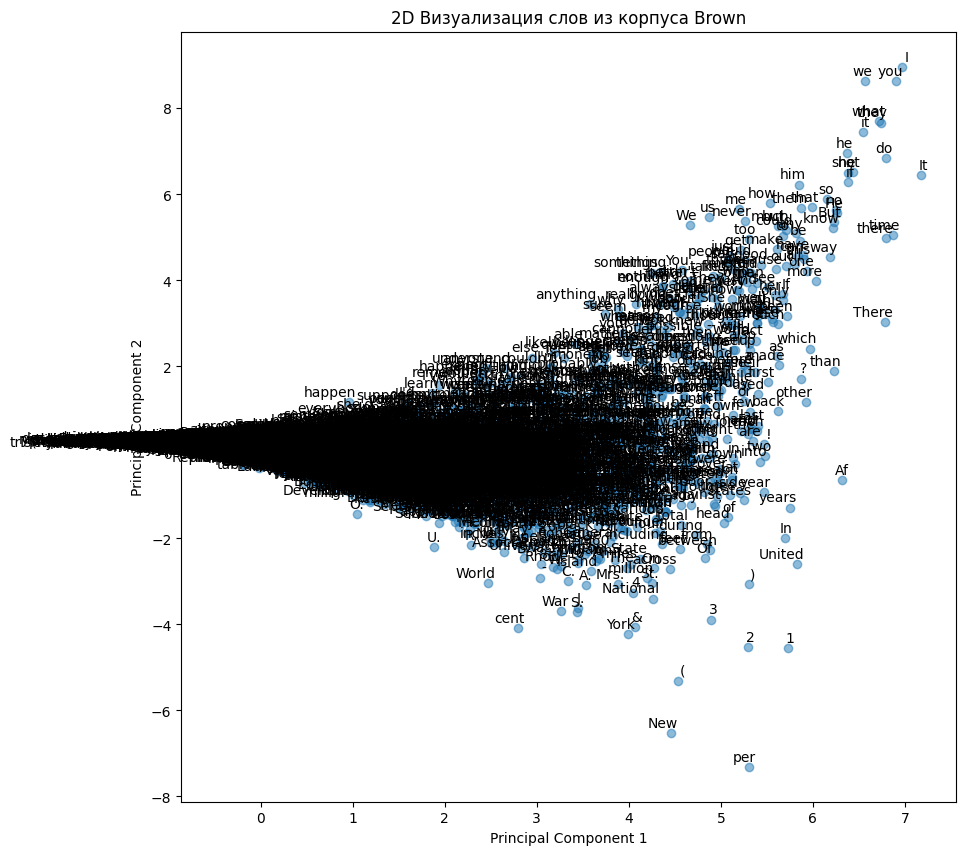

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Получение векторов для слов
words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

# Применение метода главных компонент
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

# Визуализация
plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)

for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('2D Визуализация слов из корпуса Brown')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()